In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [123]:
#Data Call
Data_P = pd.ExcelFile('Data_MSCI_m.xlsx').parse('Price').set_index('Date')
Data_TR = pd.ExcelFile('Data_MSCI_m.xlsx').parse('TR').set_index('Date')

In [124]:
#HPR(Except RF)
HPR = Data_TR.pct_change()*100 #pct_change .shift(1)안해도 전기간대비 수익률 퍼센트로 보여줌
HPR['CD1m']=Data_TR['CD1m'].shift(1)/12

In [125]:
#Vol 
VOL = HPR.iloc[:,1:11].rolling(24).std() #24개월을 호라이즌으로 하여 변동성을 롤링하면서 구해준다.

In [126]:
#
VOL_R = VOL.rank(axis=1, ascending= True)  #변동성이 낮은 순위대로 1~5위까지 동일가중치를 정해준다.
VOL_R[VOL_R <= 5.0] = 0.2
VOL_R [VOL_R > 5.0] =0

In [127]:
Rp = pd.DataFrame((HPR.iloc[:,1:11]* VOL_R.shift(1)).sum(axis=1),columns = ['RP']) #섹터HPR에 로우볼투자

In [128]:
Stdate = '2002-12-31'  #투자기준일자

Vp = Rp.loc[Stdate:,:]
Vp.iloc[0,0] = 0
Vp = (Vp/100 + 1).cumprod()*100
Vp.columns = ['Vp']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [129]:
#Rm (series 형태)
Rm = pd.DataFrame(HPR.iloc[:,0]).copy()
Date = Data_P.index
Time = Date[idx:].copy()
numData = Time.shape[0]

In [130]:
p_bm = Rm.loc[Stdate:,:]
p_bm.iloc[0,0]=0
p_bm = (p_bm/100 + 1).cumprod()*100
p_bm.columns = ['PBM']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
#모멘텀 도출
vol_max = Vp.cummax()
mdd_vol = (Vp/vol_max-1)*100

pbm_max = p_bm.cummax()
mdd_pbm = (p_bm/pbm_max-1)*100

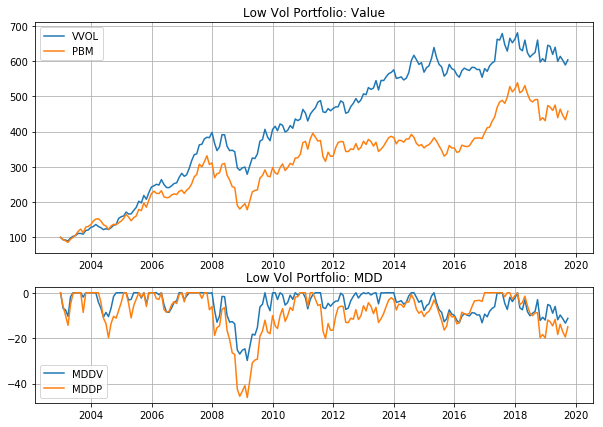

In [132]:
#그래프 그리기
fig = plt.figure(figsize = (10,7))
gs = gridspec.GridSpec(nrows=2,
                       ncols =1,
                       height_ratios= [8,4],
                       width_ratios= [5]) #subplot의 크기를 서로 다르게 설정

#Value
ax0 = plt.subplot(gs[0])
ax0.plot(Time,Vp, label = 'VVOL');
ax0.plot(Time, p_bm, label = 'PBM');
plt.title('Low Vol Portfolio: Value')
ax0.grid(True)
ax0.legend()

#MDD
ax1 = plt.subplot(gs[1])
ax1.plot(Time, mdd_vol, label = 'MDDV');
ax1.plot(Time, mdd_pbm, label = 'MDDP');
plt.title('Low Vol Portfolio: MDD')
ax1.grid(True)
ax1.legend()